## Annals of Dagobah: A Data Analysis of Star Wars and Star Trek Fandom

#### Presented by: Team Data Swamp Sages of Dagobah
#### Consisting of: Stan Smith, Luke Williams, Sanhita Banerjee and Yurora Saylor

##### From the beginning when Star Trek was first introduced as a TV series in 1966 and Star Wars became a blockbuster hit on the big screen when it debuted in 1977, there has been an intense rivalry between Trekkies or Trekkers (Star Trek fans) and Star Wars loyal fans. Both franchise fandom has drawn the line in the sands for the other fighting over which franchise is the best. 

##### On one hand, you have Star Wars which depicts the seemingly never ending epic battle of good vs evil "a long time ago in a galaxy far, far away". Consequently, you have Star Trek which originally depicts a space odyssey adventure of a space crew's five-year mission "mandated by the Starfleet to seek out new life and new civilizations, and to boldly go where no man has gone before." Both franchises have something to offer for anyone interested in the Sci-Fi and Action genres.

#### Purpose:
##### The purpose of this project is to look at the correlations of the Educational demographics for a Star Wars fan and Star Trek fan and locate a correlation. The purpose was created based on the dataset found (reference the 'Data Source' section) and a quote from Astrophysicist Neil deGrasse Tyson's 2015 Rolling Stone interview where he was asked if he was a Star Wars or Star Trek fan. Tyson responded, "I'm ‘Star Wars’ fluent, but I'm a bigger ‘Trek’ fan. There's a promise of actual science going on in ‘Star Trek’ but not so much in ‘Star Wars." 

##### Here is a world reknown astrophysicist who holds two Master degrees and one Ph.D degree and he prefers Star Trek over Star Wars.

#### Question:
##### Among Star Wars fans, is there a correlation between Education level and being a Star Trek Fan?

#### Hypothesis:
##### Among Star Wars fans is there is a positive correlation between education level and being a Star Trek fan?

#### Null Hypothesis:
##### There is no direct correlation between education level and being a star trek fan among Star Wars fans.

#### Data Source:
##### The dataset is a .csv file compiled from a SurveyMonkey Audience poll conducted for the FiveThirtyEight’s online story: “America’s Favorite Star Wars Movies and Least Favorite Movies Character” which was written by Walt Hickey. The article highlighted the gender demographics of a Star Wars fan where “85% of men have seen at least one “Star Wars” film compared to 72% of women. Men were also more likely to consider themselves a fan of the franchise: 72 percent of men compared to 60 percent of women.”

##### The poll surveyed 1186 people asking them several questions, but the ones that our team will focus on for this project will be regarding the Education aspect and Star Wars and Star Trek fandom:

#####   •	Are you a Star Wars fan?
#####   •	Are you a Star Trek fan?
#####   •	What is your highest education level: Less than high school degree, High School degree, Some college or Associate degree, Bachelor’s #####       degree and Graduate degree?

##### https://github.com/fivethirtyeight/data/tree/master/star-wars-survey


In [1]:
#This is the primary Coding module for the project \"The Annals of Dagobah\" by the group The Data Swamp Sages of Dagobah.\n",
   
%matplotlib inline
   
# Dependencies and Setup\
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
 
# File to Load
path_StarWars = "Resources/StarWars.csv"
    
df_StarWars = pd.read_csv(path_StarWars, encoding='iso8859_2')

df_StarWars.head()
    

,RespondentID,Seen_SW,SW_Fan,SW_Movie1,SW_Movie2,SW_Movie3,SW_Movie4,SW_Movie5,SW_Movie6,SW_Ep1_Rank,...,Y_Prefer,Char_Shot_First,Expand_Univer_Respond,Expand_Univer_Fan,StarTrek_Fan,Gender,Age,Household Income,Education,Location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Total Population Analysis (Education)

In [2]:
# Generate and Normalize Total Population Histogram
# -------------------------------------------------

# Clean the dataset by dropping all 'NaN' values from the 'Education', 'StarTrek_Fan' and 'SW_Fan' columns
df_NoNull = df_StarWars.dropna(subset=['Education','StarTrek_Fan', 'SW_Fan'])
df_SW_cln = df_NoNull

# Calculate the number of Star Wars Fans grouped by Education level
NoNull_edu_grpd = df_NoNull.groupby('Education')['SW_Fan'].count()
df_NoNull_edu_grpd = pd.DataFrame(NoNull_edu_grpd)

dict_freq = {}
ser_index = df_NoNull_edu_grpd.index.get_values()

ctr = 0
for index in ser_index:
    dict_freq[index] = df_NoNull_edu_grpd.iloc[ctr,0]
    ctr += 1
       
# Copied the 'Education' column and renamed the new column to 'Score Weight' 
df_SW_cln['Score_Weight']=df_SW_cln['Education']

# Converted the string values to integer values in the new 'Score Weight' column
df_SW_cln['Score_Weight'].replace(to_replace='Less than high school degree',value=(1/dict_freq['Less than high school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='High school degree',value=(1/dict_freq['High school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Some college or Associate degree',value=(1/dict_freq['Some college or Associate degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Bachelor degree',value=(1/dict_freq['Bachelor degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Graduate degree',value=(1/dict_freq['Graduate degree']),inplace=True)
ser_ScoreWeight = df_SW_cln['Score_Weight']


# Copied the 'Education' column and renamed the new column to 'Education_Score'
df_SW_cln['Education_Score']=df_SW_cln['Education']

# Converted the string values to integer values in the new 'Education_Score'
df_SW_cln['Education_Score'].replace(to_replace='Less than high school degree',value=1,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='High school degree',value=2,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Some college or Associate degree',value=3,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Bachelor degree',value=4,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Graduate degree',value=5,inplace=True)
ser_EduScore = df_SW_cln['Education_Score']


C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

### Total Population Histogram Analysis (Education)

C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


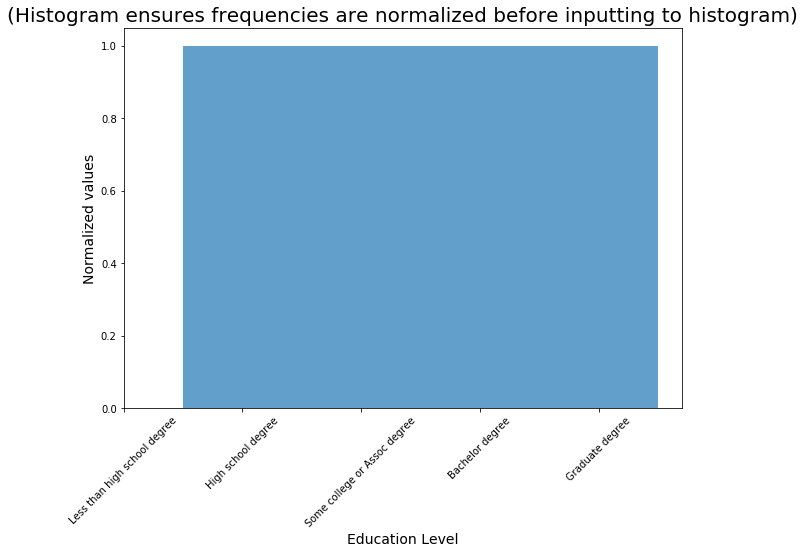

In [3]:
# Histogram ensures frequencies are normalized before inputting to histogram

# Create Histogram's bin labels
bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree',
              'Graduate degree']


# Create Histogram Plot of Data
plt.figure(figsize=(10,7))
plt.title("(Histogram ensures frequencies are normalized before inputting to histogram)", fontsize=20)
plt.subplot()
plt.hist(ser_EduScore, bins=5, density=False, weights=ser_ScoreWeight, alpha=0.7, label="Education Level")
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Normalized values", fontsize=14)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)

# Save Figure
plt.savefig("Images/Normalized Total Population (Education) Histogram.png")
plt.show()


### Total Star Trek Fan Population Histogram Analysis (Education)

411


C:\Users\Admin\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


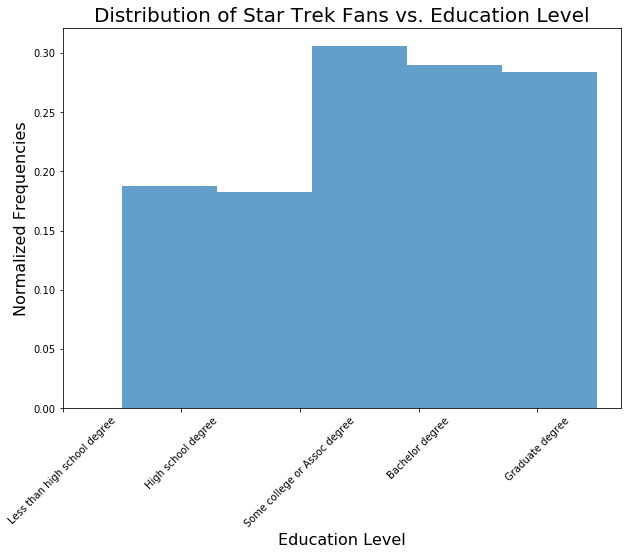

In [4]:
# Generate and normalize Star Trek fans from Star Wars fan population Histogram
# ---------------------------------------------------------------- 

# Count the number of Star Trek fans
df_ST_Yes = df_SW_cln.loc[(df_SW_cln['StarTrek_Fan']=='Yes')]
print(len(df_ST_Yes))

ser_EduScore2 = df_ST_Yes['Education_Score']
ser_EduWeight2 = df_ST_Yes['Score_Weight']

bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree',
              'Graduate degree']

# Histogram Plot of Data
plt.figure(figsize=(10,7))
plt.title("Distribution of Star Trek Fans vs. Education Level", fontsize=20)
plt.xlabel("Education Level", fontsize=16)
plt.ylabel("Normalized Frequencies", fontsize=16)
plt.subplot()
plt.hist(ser_EduScore2, bins=5, density=True, weights=ser_EduWeight2, alpha=0.7, label="Education Level")

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)

# Save Figure
plt.savefig("Images/Distribution of Star Trek Fans vs Education Level Histogram.png")
plt.show()

### Total Star Trek AND Star Wars Fan Population Histogram Analysis (Education)

539
367


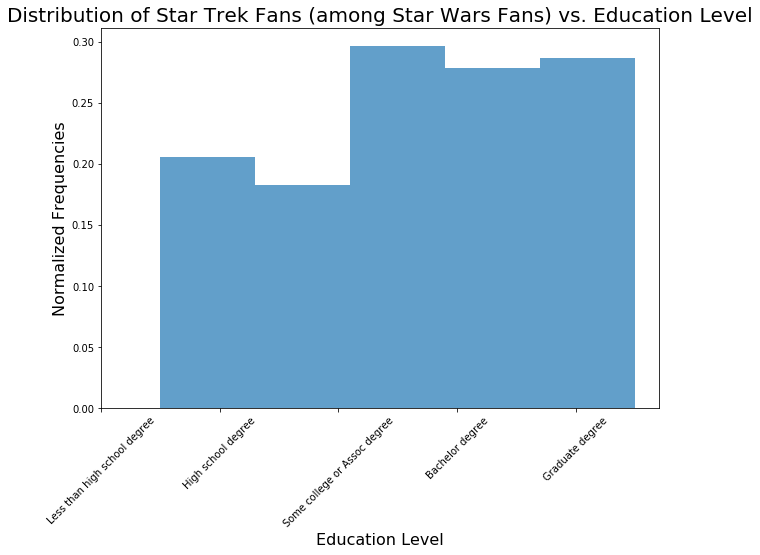

In [5]:
#Generate and normalize total population of Star Trek AND Star Wars fans Histogram
#---------------------------------------------------------------------------------

# Clean data to include all 'Yes' responses from Star Wars Fans
df_SW_Yes = df_SW_cln.loc[(df_SW_cln['SW_Fan']=='Yes')]
print(len(df_SW_Yes))

# Further clean data to include all 'Yes' responses from Star Trek Fans
df_SW_Yes_ST_Yes = df_SW_Yes.loc[(df_SW_Yes['StarTrek_Fan']=='Yes')]
print(len(df_SW_Yes_ST_Yes))


ser_EduScore3 = df_SW_Yes_ST_Yes['Education_Score']
ser_EduWeight3 = df_SW_Yes_ST_Yes['Score_Weight']

# Create Histogram's bins
bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']

# Histogram Plot of Data
plt.figure(figsize=(10,7))
plt.title("Distribution of Star Trek Fans (among Star Wars Fans) vs. Education Level", fontsize=20)
plt.xlabel("Education Level", fontsize=16)
plt.ylabel("Normalized Frequencies", fontsize=16)
plt.hist(ser_EduScore3, bins=5, density=True, weights=ser_EduWeight3, alpha=0.7, label="Education Level")

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)

# Save Figure
plt.savefig("Images/Distribution of Star Trek Fans (among Star Wars Fans) vs. Education Level.png")
plt.show()



### Contingency Table Analysis (Chi Square Test Calculations)

In [6]:
# Create a Contingency table to calculate the correct Expected distribution for Chi Square test between two 
# observation distributions.
#-----------------------------------------------------------------------------------------------------------------

ST_Yes_edu_grpd = df_ST_Yes.groupby('Education')['SW_Fan'].count()
df_ST_Yes_edu_grpd = pd.DataFrame(ST_Yes_edu_grpd)


SW_Yes_ST_Yes_grpd = df_SW_Yes_ST_Yes.groupby('Education')['SW_Fan'].count()
df_SW_Yes_ST_Yes_grpd = pd.DataFrame(SW_Yes_ST_Yes_grpd)


df_combo = df_ST_Yes_edu_grpd.merge(right=df_SW_Yes_ST_Yes_grpd,how='inner', on='Education')
 
df_combo.rename(columns={'SW_Fan_x': 'SW_&_NonSW_Fans', 'SW_Fan_y': 'SW_Fans'},inplace='true')

df_combo_T1 = df_combo.T


df_combo_T1['Less than high school degree'] = df_combo_T1['Less than high school degree'] * (1/dict_freq['Less than high school degree'])
df_combo_T1['High school degree'] = df_combo_T1['High school degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Some college or Associate degree'] = df_combo_T1['Some college or Associate degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Bachelor degree'] = df_combo_T1['Bachelor degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Graduate degree'] = df_combo_T1['Graduate degree'] * (1/dict_freq['High school degree'])

df_combo = df_combo_T1.T

#Need to keep minimum count in our table >= 5.  So multiple all values by (5/mimumum weighted count value)
df_combo = df_combo*(5/df_combo.iloc[2,1])


df_combo['Edu_Tot'] = df_combo['SW_&_NonSW_Fans'] + df_combo['SW_Fans']

df_combo.reset_index(inplace=True)

df_combo.rename(columns={'Education':'Fan_Base'},inplace=True)
df_combo.set_index('Fan_Base',inplace=True)
df_combo_T = df_combo.T

df_combo_T['Fan_Base_Tot'] = df_combo_T['Less than high school degree'] + df_combo_T['High school degree'] + df_combo_T['Some college or Associate degree'] + df_combo_T['Bachelor degree'] + df_combo_T['Graduate degree']
df_Cont_tbl = df_combo_T.rename(columns={'Education':'Fan_Base'})

df_Cont_tbl.to_csv("Images/Contingency Table for Expected Distribution (Chi Squared).csv", sep='\t')
df_Cont_tbl.head()



Fan_Base,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Some college or Associate degree,Fan_Base_Tot
SW_&_NonSW_Fans,32.142857,27.142857,5.47619,5.634921,32.857143,103.253968
SW_Fans,28.095238,25.000000,5.00000,5.634921,29.047619,92.777778
Edu_Tot,60.238095,52.142857,10.47619,11.269841,61.904762,196.031746


### Expected Values Table Analysis (Chi Square Test Calculations)

In [7]:
# Create an Expected Values table based on Contingency table.
#------------------------------------------------------------

df_Expect_bld = df_Cont_tbl.copy(deep=True)
print(df_Expect_bld)

for row in range(0,2):    
    for col in range(0,6):
        df_Expect_bld.iloc[row,col] = ((df_Cont_tbl.iloc[row,5]*df_Cont_tbl.iloc[2,col])/df_Cont_tbl.iloc[2,5])

df_Expect_tbl_1 = df_Expect_bld.drop(columns ='Fan_Base_Tot')
df_Expect_tbl = df_Expect_tbl_1.drop(index='Edu_Tot')

df_Expect_tbl.to_csv("Images/Expected Values Table for Contingency Table (Chi Squared).csv", sep='\t')
df_Expect_tbl.head()


Fan_Base         Bachelor degree  Graduate degree  High school degree  \
SW_&_NonSW_Fans        32.142857        27.142857             5.47619   
SW_Fans                28.095238        25.000000             5.00000   
Edu_Tot                60.238095        52.142857            10.47619   

Fan_Base         Less than high school degree  \
SW_&_NonSW_Fans                      5.634921   
SW_Fans                              5.634921   
Edu_Tot                             11.269841   

Fan_Base         Some college or Associate degree  Fan_Base_Tot  
SW_&_NonSW_Fans                         32.857143    103.253968  
SW_Fans                                 29.047619     92.777778  
Edu_Tot                                 61.904762    196.031746  


Fan_Base,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Some college or Associate degree
SW_&_NonSW_Fans,31.728649,27.464719,5.518026,5.936058,32.606516
SW_Fans,28.509447,24.678138,4.958165,5.333783,29.298246


### Chi Square Test Analysis

In [8]:
# Run Chi Square test for each Fan Base, add resulting Chi Statistics, and evaluate significance.
#-----------------------------------------------------------------------------------------------------------------

# Each Fan Base has five education levels, so the degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.


# Calculate the Chi Squared Critical Value on which to evaluate significance
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print("Chi Square Critical Value: " + str(critical_value))

#Finalize Observation Table by dropping totals Column and Row
df_Obs_tbl_1 = df_Cont_tbl.drop(columns ='Fan_Base_Tot')
df_Obs_tbl = df_Obs_tbl_1.drop(index='Edu_Tot')


df_Obs_tbl_T = df_Obs_tbl.T

df_Expect_tbl_T = df_Expect_tbl.T

# Run the chi square test with stats.chisquare()
chisq1, p1 = stats.chisquare(df_Obs_tbl_T['SW_&_NonSW_Fans'], df_Expect_tbl_T['SW_&_NonSW_Fans'])

print("The Chi Square Statistic for Star Wars fans and Non-Star Wars fans: " + str(chisq1))
print("The P-value for Star Wars fans and Non-Star Wars fans: " + str(p1))
print()


chisq2, p2 = stats.chisquare(df_Obs_tbl_T['SW_Fans'], df_Expect_tbl_T['SW_Fans'])

print("The Chi Square Statistic for Star Wars fans: " + str(chisq2))
print("The P-Value for Star Wars fans: " + str(p2))
print()

print("The total Chi Square Statistic: " + str(chisq1) + " + " + str(chisq2) + " = " + str(chisq2+chisq1))
print("The total Chi Square Statistic of " + str(chisq2+chisq1) +  "is less than our Critical value of " + str(critical_value) + ".  Thus, the difference betwen our two distributions is not significant.")
print()


print("The total P-Value Statistic: " + str(p1) + " x " + str(p2) + " = " + str(p1*p2)) 
print("The total P-Value Statistic of " + str(p1*p2) + " is far greater than our significance P-Value of '.05'. Thus, the difference betwen our two distributions is not significant.")
print()



Chi Square Critical Value: 9.487729036781154
The Chi Square Statistic for Star Wars fans and Non-Star Wars fans: 0.026699679229070898
The P-value for Star Wars fans and Non-Star Wars fans: 0.9999116799965521

The Chi Square Statistic for Star Wars fans: 0.029714527525253543
The P-Value for Star Wars fans: 0.9998907179791081

The total Chi Square Statistic: 0.026699679229070898 + 0.029714527525253543 = 0.056414206754324445
The total Chi Square Statistic of 0.056414206754324445is less than our Critical value of 9.487729036781154.  Thus, the difference betwen our two distributions is not significant.

The total P-Value Statistic: 0.9999116799965521 x 0.9998907179791081 = 0.9998024076274487
The total P-Value Statistic of 0.9998024076274487 is far greater than our significance P-Value of '.05'. Thus, the difference betwen our two distributions is not significant.



### Final Analysis

##### Based on the above analysis, there is no direct correlations between one's Education level versus their preference for franchise fandom.

##### If given more then 2 weeks, our team would have liked to also done the following:

#####      •    Conduct more extensive demographic analysis during data exploration phase to look for basic correlations among data

#####      •	Conduct API requests of databases such as OMDB in order to help validate this survey

#####      •	Conduct logistic regression analysis to parse out variables that may correlate with Star Trek “fandom”
